# Homework 2: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [13]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr


### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [9]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_north = xr.open_dataset("NVEL_2015_12.nc")
ds_east = xr.open_dataset("EVEL_2015_12.nc")

print(ds_north['NVEL'])




<xarray.DataArray 'NVEL' (time: 1, k: 50, j: 360, i: 720)> Size: 104MB
[12960000 values with dtype=float64]
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
Attributes:
    units:          m/s
    long_name:      Northward Component of Velocity (m/s)
    standard_name:  northward_sea_water_velocity


In [10]:
# store the velocity components and longitude/latitude data
# into numpy arrays

evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])

lon = np.array(ds_east['longitude'])
lat = np.array(ds_north['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

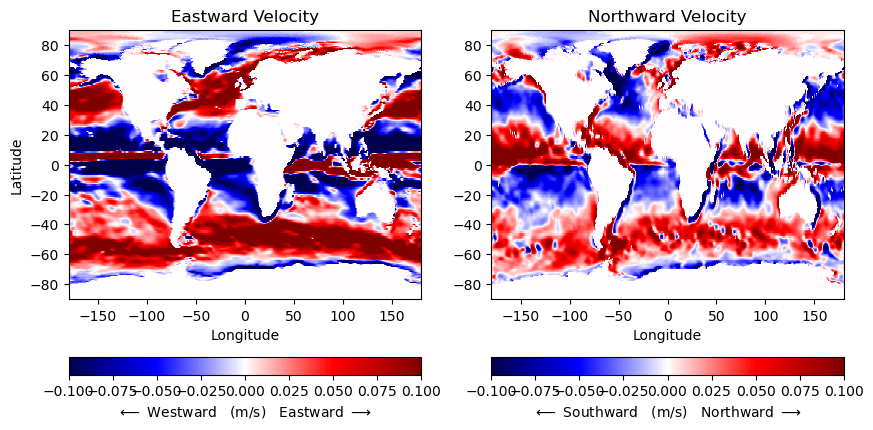

In [24]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -0.1, vmax=0.1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -0.1, vmax=0.1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

Answers:
1) 30deg N on the east cost of the U.S, the currents are roughly moving up and to the east towards canada and moving towards the upper atlantic, while on the west coast, the currents are going down the coast of CA towards mexico. 45deg N on the east coast, the currents are roughly oving slighly up and to the east, more towards the central atlantic, while on the west coast, the current will still go east and down towards mexico.
2) The east coast currents seem to be moving faster than the west, maybe due to the size of the pacific on the west slowing currents down.
3) Since the currents near the equator move westard due to the Coriolis effect, and the winds coming in from the north drive the currents downwards as well, gyres are created on both coasts of the US. The north pacific gyre goes west from the equator, then is moved up and east towards the west coast, then back down towards the equator. Similarly for the north atlantic, the gyre goes west from the equator and up towards the east coast, then back east and down towards the equator. 


### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [146]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_theta = xr.open_dataset('THETA_2015_12.nc')
ds_theta.head


<bound method Dataset.head of <xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-

In [147]:
# store the THETA grid into a into numpy array
theta_grid = np.array(ds_theta['THETA'])
theta_grid.shape


(1, 50, 360, 720)

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

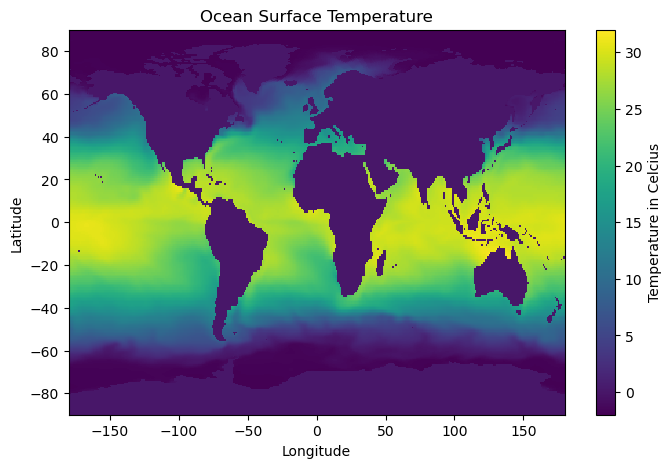

In [142]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

lon = np.array(ds_theta['longitude'])
lat = np.array(ds_theta['latitude'])

# make a figure
fig = plt.figure(figsize=(8,5))
C = plt.pcolormesh(lon, lat,theta_grid[0, 0, :, :], vmin = -2, vmax=32, cmap='viridis')


# plot the data
plt.colorbar(label = 'Temperature in Celcius')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ocean Surface Temperature')
plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here
1. The temperature on the west coast of the US is much cooler that on the east coast.
2. This might occur due to the cool currents coming in down from canada and the artic on the west brining in cooler water, while on the east the warm currents from the gulf of mexico closer to the equator get brought up along the coast. 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [172]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
xr_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')
vmin = wvel.min()  # or np.min(wvel)
vmax = wvel.max()  # or np.max(wvel)
print("Min velocity:", vmin)
print("Max velocity:", vmax)


Min velocity: -0.00024735330953262746
Max velocity: 0.0002688579843379557


In [90]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(xr_wvelstar['WVELSTAR'])
wvel.shape

(1, 50, 360, 720)

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.



In [152]:
# read in the depth variable to a numpy array
vel_depth = np.array(xr_wvelstar['k_l'])
vel_lon = np.array(xr_wvelstar['longitude'])
temp_depth = np.array(ds_theta['k'])

# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
#ANSW  -  name of the depth var is k_l


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

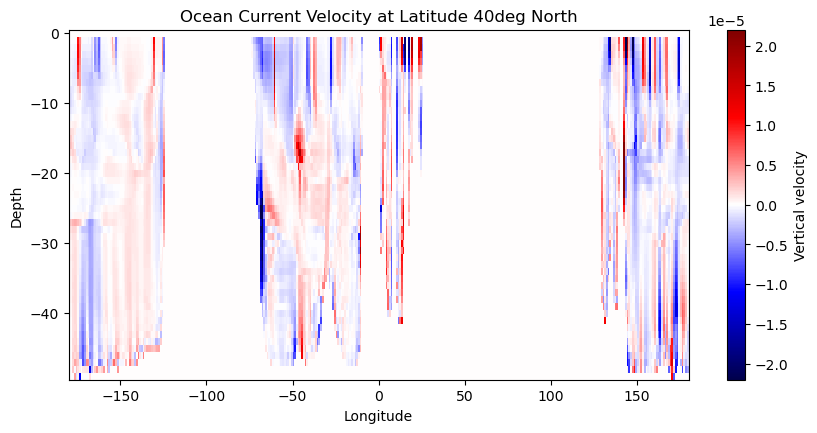

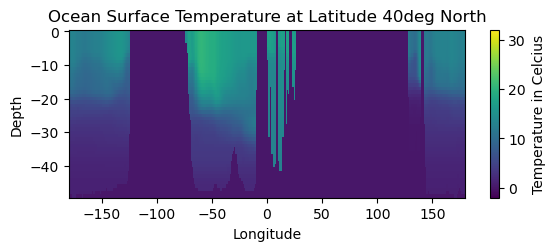

In [200]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(vel_lon, -vel_depth, wvel[0,:,259,:], vmin = -0.000022, vmax=0.000022,shading = 'auto',cmap = 'seismic')

plt.title("Ocean Current Velocity at Latitude 40deg North")
plt.colorbar(label = 'Vertical velocity')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.show()



# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon, -temp_depth,theta_grid[0, :, 259, :], vmin = -2, vmax=32, cmap='viridis')
plt.colorbar(label = 'Temperature in Celcius')
plt.title("Ocean Surface Temperature at Latitude 40deg North")
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.show()



### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# change this cell to a markdown and input your response here
1. The currents on the west coast have much more defined and separated areas of positive or negative vertical velocities. On the other hand, the east cost shows a scramble throughout the depths of both positive and negative velocities. This may be due to vertical winds have more of an effect on the west coast than on the east. 
2. Horizontal velocity can experience some different forces due to the rotation of the earth (coriolis effect) and horizontal winds. Vertical speeds of the ocean can also be due to the winds, but are not affected by the rotation of the earth. 
3. If there are positive vertical velocity currents, then they will bring up colder water, while negative velocity currents will push down warmer water. 
4. While the winds will send water currents verticaly along the coast, they will also veer slightly to the right due to ekman dynamics which will send certain currents going downwards, and some coming upwards. 